<a href="https://colab.research.google.com/github/gtyagi777/IDS-for-SDN/blob/master/Phase1_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd


In [2]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_list = drive.ListFile({'q': "'1r2Ybi5qAP3XI6JyI2jojaAc1m_UFxxqz' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

    100% |████████████████████████████████| 993kB 20.0MB/s 
title: Dataset Analysis.ipynb, id: 1FVyxCdWX97kdWtYFzBnUErCYSHIdEKX6
title: Copy of Dataset Analysis.ipynb, id: 1ppyoekXElY750gGtquDFowGR4dRqSF5K
title: Untitled3.ipynb, id: 1zdwyAmMsV6uriekN7Fpkmnl-NwQ3VgOZ
title: DF.pkl, id: 1y3JHFffO0s9CvD4VoeVJsv-Dk9Rsi1g5
title: MNIST.ipynb, id: 1p42wxMR_N_6MqrbW8MObPWbaSN1U_dfd
title: Untitled2.ipynb, id: 1YGqV7tCSnwWydp072wxdq6tMnJs_lnD_
title: LearningTensorFlow.ipynb, id: 1nWmCudsGj1OcgRE6bjc3qsbG9nLX44Nj
title: Untitled1.ipynb, id: 142t-wUTLHaMSW8Micxkz0xleBRvcpAhU
title: Untitled0.ipynb, id: 10zKY7D_nwzktg3iYm9culrxB6mW_DjL9


In [0]:
train_downloaded = drive.CreateFile({'id': '1y3JHFffO0s9CvD4VoeVJsv-Dk9Rsi1g5'})
train_downloaded.GetContentFile('DF.pkl')
df = pd.read_pickle('DF.pkl')


In [10]:
import numpy as np
df_Norm = df.drop([' Label'], axis=1)
# Number of data points in the minority class
number_records_fraud = len(df_Norm[df_Norm.Class == 1])
fraud_indices = np.array(df_Norm[df_Norm.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = df_Norm[df_Norm.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = df_Norm.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of Benign Cases: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of Malicious Activity: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of cases: ", len(under_sample_data))


Percentage of Benign Cases:  0.4652496783791748
Percentage of Malicious Activity:  0.5347503216208253
Total number of cases:  1113112


In [0]:
from sklearn import preprocessing

X = X_undersample.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X_undersample_Norm = pd.DataFrame(x_scaled)

In [13]:
from sklearn.model_selection import train_test_split

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample_Norm
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.2
                                                                                                   ,random_state = 0)
print("")
print("Rows in training undersample dataset: ", len(X_train_undersample))
print("Rows in test undersample dataset: ", len(X_test_undersample))
print("Total number: ", len(X_train_undersample)+len(X_test_undersample))


Rows in training undersample dataset:  890489
Rows in test undersample dataset:  222623
Total number:  1113112


In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train_undersample,y_train_undersample.values.ravel())



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
y_pred_undersample = clf.predict(X_test_undersample.values)


Recall:  0.9997736816958785
Accuracy 0.999811340247863


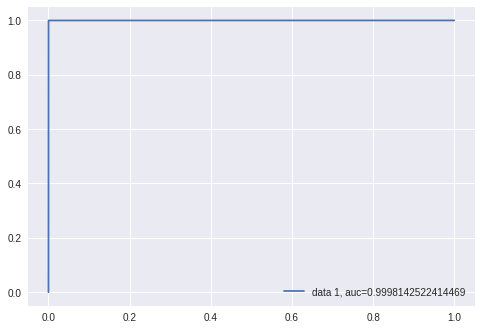

In [17]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score 

cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
print("Recall: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))
print("Accuracy" ,accuracy_score(y_test_undersample,y_pred_undersample))

from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test_undersample,y_pred_undersample)
auc = metrics.roc_auc_score(y_test_undersample,y_pred_undersample)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
